## Import Libraries

In [236]:

import geopandas as gpd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/co2-emersion/CO2Emission_LifeExp.csv
/kaggle/input/world-bound/WB_countries_Admin0_10m.shp.xml
/kaggle/input/world-bound/WB_countries_Admin0_10m.dbf
/kaggle/input/world-bound/WB_countries_Admin0_10m.cpg
/kaggle/input/world-bound/WB_countries_Admin0_10m.shp
/kaggle/input/world-bound/WB_countries_Admin0_10m.shx
/kaggle/input/world-bound/WB_countries_Admin0_10m.sbn
/kaggle/input/world-bound/WB_countries_Admin0_10m.prj
/kaggle/input/world-bound/WB_countries_Admin0_10m.sbx


## Getting Know About Dataset

In [237]:
df = pd.read_csv('../input/co2-emersion/CO2Emission_LifeExp.csv')

In [238]:
df.head()

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441


In [239]:
df.tail()

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
203,Vietnam,VNM,206042140,0.09,2.20,93640422,75.172
204,Western Sahara,ESH,207592,2.61,0.39,538749,69.496
205,Yemen,YEM,25647990,1.62,0.94,27168208,66.087
206,Zambia,ZMB,4230584,3.67,0.26,16363458,62.464
207,Zimbabwe,ZWE,10062628,-4.17,0.72,14030331,60.294


In [240]:
df.shape

(208, 7)

In [241]:
df.isnull().sum()

Country           0
Code              0
CO2Emissions      0
YearlyChange      0
Percapita         0
Population        0
LifeExpectancy    0
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         208 non-null    object 
 1   Code            208 non-null    object 
 2   CO2Emissions    208 non-null    int64  
 3   YearlyChange    208 non-null    float64
 4   Percapita       208 non-null    float64
 5   Population      208 non-null    int64  
 6   LifeExpectancy  208 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 11.5+ KB


In [243]:
df.describe()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
count,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,1.661510e+08,2.586538,4.700577,3.547621e+07,72.699375
std,8.327638e+08,3.266324,5.735284,1.388659e+08,7.708037
min,1.530000e+03,-6.380000,0.030000,2.928000e+03,51.593000
25%,1.679310e+06,1.510000,0.690000,1.156140e+06,67.906250
50%,9.387305e+06,2.215000,2.605000,6.998900e+06,74.301500
75%,5.969547e+07,3.605000,6.415000,2.401059e+07,78.655250
max,1.043275e+10,19.490000,37.290000,1.414049e+09,84.277000


In [244]:
df_new = df.drop(['Country','Code'],axis=1)

In [245]:
df_new.head()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,9900004,7.13,0.28,35383032,63.763
1,5208319,4.45,1.80,2886438,78.194
2,156220560,0.17,3.85,40551392,76.298
3,30566933,3.13,1.06,28842489,59.925
4,30262,1.52,2.10,14429,81.441


# Exploratory Data Analysis

## Highest CO2 Emerssions Countries

In [246]:
co2_sorted_dec = pd.DataFrame(df.sort_values(by=['CO2Emissions'],ascending=False)).head(10)
co2_sorted_dec

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
39,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
198,United States,USA,5011686600,-2.01,15.52,323015995,78.885
88,India,IND,2533638100,4.71,1.91,1324517249,68.897
153,Russia,RUS,1661899300,-2.13,11.44,145275383,71.835
96,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090
72,Germany,DEU,775752190,1.28,9.44,82193768,80.902
33,Canada,CAN,675918610,-1.00,18.58,36382944,82.117
90,Iran,IRN,642560030,2.22,8.08,79563989,76.047
173,South Korea,KOR,604043830,0.45,11.85,50983457,82.379
89,Indonesia,IDN,530035650,6.41,2.03,261556381,71.035


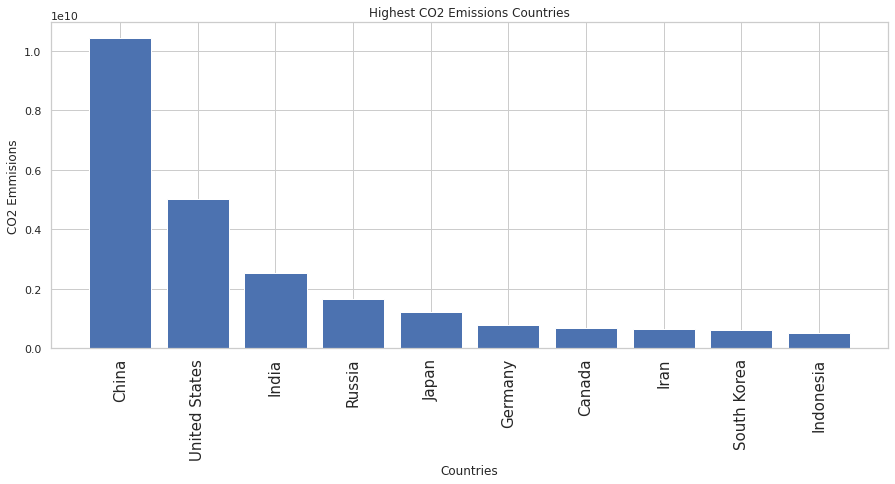

In [247]:

plt.figure(figsize=(15,6))
plt.bar(co2_sorted_dec['Country'],co2_sorted_dec['CO2Emissions'])
plt.xticks(rotation='vertical',size=15)
plt.title("Highest CO2 Emissions Countries")
plt.xlabel("Countries")
plt.ylabel("CO2 Emmisions")
plt.show()

## Lowest CO2 Emissions Countries

In [248]:
co2_sorted_asc = pd.DataFrame(df.sort_values(by=['CO2Emissions'],ascending=True)).head(10)
co2_sorted_asc

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
76,Greenland,GRL,1530,0.86,0.03,56412,71.493
62,Faeroe Islands,FRO,1953,0.60,0.04,48173,80.255
158,Saint Pierre & Miquelon,SPM,8842,1.51,1.49,5934,80.654
155,Saint Helena,SHN,13128,2.62,2.20,5956,80.251
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441
43,Cook Islands,COK,37354,7.19,2.13,17524,75.631
141,Palau,PLW,41732,7.19,2.35,17725,73.089
63,Falkland Islands,FLK,48568,1.51,16.59,2928,81.021
100,Kiribati,KIR,52818,7.18,0.47,112524,67.577
161,Sao Tome & Principe,STP,56185,2.60,0.28,203227,69.670


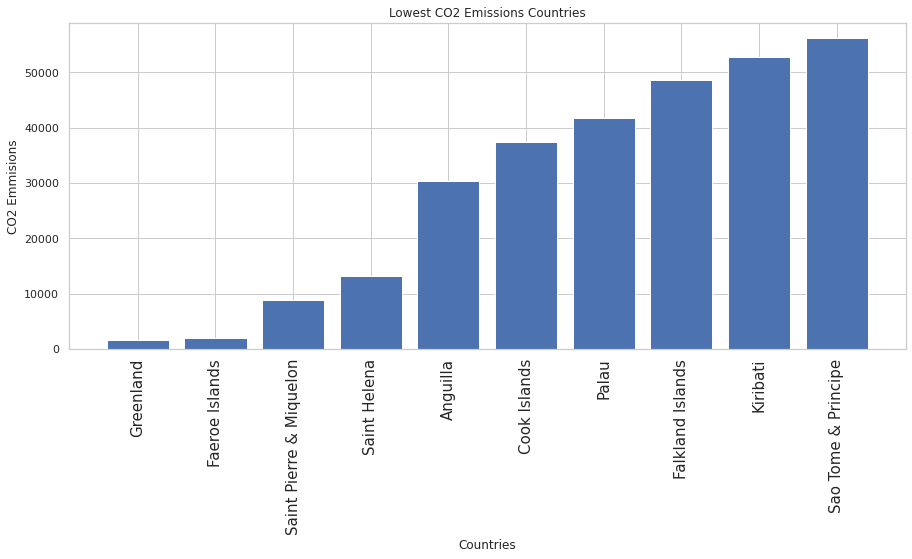

In [249]:
plt.figure(figsize=(15,6))
plt.bar(co2_sorted_asc['Country'],co2_sorted_asc['CO2Emissions'])
plt.xticks(rotation='vertical',size=15)
plt.title("Lowest CO2 Emissions Countries")
plt.xlabel("Countries")
plt.ylabel("CO2 Emmisions")
plt.show()

## Highest Life Expectency Countries

In [250]:
exp_sorted_dec = pd.DataFrame(df.sort_values(by=['LifeExpectancy'],ascending=False)).head(10)
exp_sorted_dec

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
85,Hong Kong,HKG,47066386,1.23,6.50,7243542,84.277
96,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090
111,Macao,MAC,3106518,7.19,5.07,612836,83.854
35,Cayman Islands,CYM,406057,1.52,6.49,62569,83.480
180,Switzerland,CHE,39666930,-2.30,4.73,8379917,83.310
175,Spain,ESP,251892320,-3.12,5.40,46634140,83.145
167,Singapore,SGP,48381759,2.56,8.56,5653634,83.083
94,Italy,ITA,358139550,0.84,5.90,60663060,83.008
9,Australia,AUS,414988700,-0.98,17.10,24262712,82.959
87,Iceland,ISL,3923884,1.62,11.81,332206,82.601


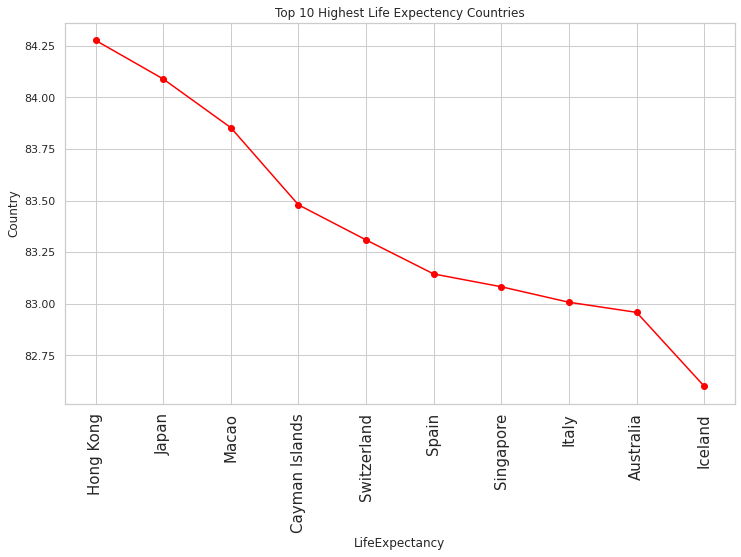

In [251]:
# Define plot space
fig, ax = plt.subplots(figsize=(12, 7))

# Define x and y axes
ax.plot(exp_sorted_dec.Country, 
        exp_sorted_dec.LifeExpectancy,
        marker = 'o',
        color = 'red')

# Set plot title and axes labels
ax.set(title = "Top 10 Highest Life Expectency Countries",
       xlabel = "LifeExpectancy",
       ylabel = "Country",)
plt.xticks(rotation='vertical',size=15)
plt.show()

## Lowest Life Expectency Countries

In [252]:
exp_sorted_asc = pd.DataFrame(df.sort_values(by=['LifeExpectancy'],ascending=True)).head(10)
exp_sorted_asc

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
36,Central African Republic,CAF,543229,2.57,0.12,4537686,51.593
106,Lesotho,LSO,318438,2.58,0.15,2075030,52.059
37,Chad,TCD,1670941,2.14,0.11,14561660,53.438
166,Sierra Leone,SLE,1272332,3.43,0.17,7328834,53.444
135,Nigeria,NGA,82634214,0.70,0.44,185960241,53.541
171,Somalia,SOM,1268442,2.57,0.09,14185636,56.324
45,Cote d'Ivoire,CIV,10056492,1.16,0.42,23822714,56.567
60,Eswatini,SWZ,657572,2.61,0.59,1113997,56.962
174,South Sudan,SSD,4038496,4.18,0.37,10832518,57.120
81,Guinea-Bissau,GNB,318706,2.59,0.18,1782438,57.328


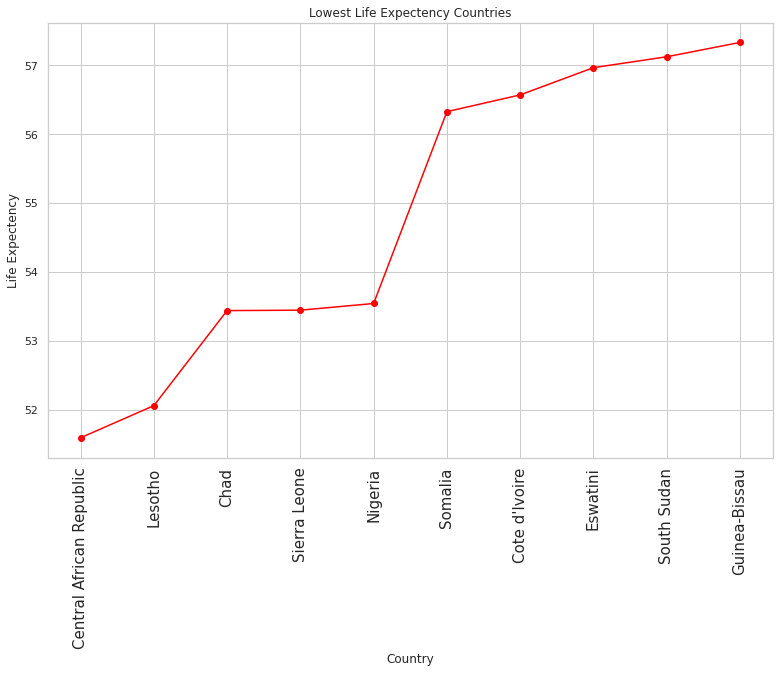

In [253]:
# Define plot space
fig, ax = plt.subplots(figsize=(13, 8))

# Define x and y axes
ax.plot(exp_sorted_asc.Country, 
        exp_sorted_asc.LifeExpectancy,
        marker = 'o',
        color = 'red')

# Set plot title and axes labels
ax.set(title = "Lowest Life Expectency Countries",
       xlabel = "Country",
       ylabel = "Life Expectency")
plt.xticks(rotation='vertical',size=15)
plt.show()

## Top Coutries With **Highest** Yearly CO2 Emmisions Changing Rate

In [254]:
yr_sorted_dec = pd.DataFrame(df.sort_values(by=['YearlyChange'],ascending=False)).head(10)
yr_sorted_dec

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
136,North Korea,PRK,58708734,19.49,2.32,25307665,71.711
123,Mongolia,MNG,18574260,18.09,6.08,3056364,69.321
146,Philippines,PHL,126922662,12.37,1.22,103663816,70.802
129,Nepal,NPL,7833787,10.10,0.29,27263433,69.848
140,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
176,Sri Lanka,LKA,18454691,8.55,0.88,21021171,76.482
145,Peru,PER,57692879,8.16,1.87,30926032,76.044
195,Ukraine,UKR,233220080,8.03,5.22,44713702,71.711
103,Laos,LAO,4531276,7.92,0.66,6845846,66.924
31,Cambodia,KHM,6496958,7.68,0.41,15766292,68.977


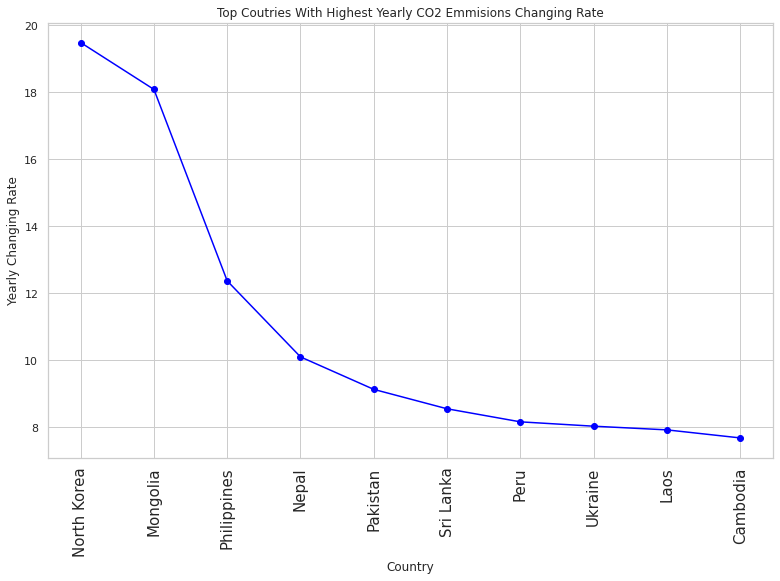

In [255]:
# Define plot space
fig, ax = plt.subplots(figsize=(13, 8))

# Define x and y axes
ax.plot(yr_sorted_dec.Country, 
        yr_sorted_dec.YearlyChange,
        marker = 'o',
        color = 'blue')

# Set plot title and axes labels
ax.set(title = "Top Coutries With Highest Yearly CO2 Emmisions Changing Rate",
       xlabel = "Country",
       ylabel = "Yearly Changing Rate")
plt.xticks(rotation='vertical',size=15)
plt.show()

## Top Countries With **Lowest** Yearly CO2 Emmisions Changing Rate

In [256]:
yr_sorted_asc = pd.DataFrame(df.sort_values(by=['YearlyChange'],ascending=True)).head(10)
yr_sorted_asc

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
197,United Kingdom,GBR,367860350,-6.38,5.55,66297944,81.111
25,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
28,Bulgaria,BGR,50872910,-6.00,7.11,7151953,74.703
189,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
54,Ecuador,ECU,40065690,-4.85,2.43,16491116,76.365
207,Zimbabwe,ZWE,10062628,-4.17,0.72,14030331,60.294
24,Botswana,BWA,6438429,-3.74,2.98,2159927,68.178
75,Greece,GRC,67840662,-3.47,6.39,10615185,81.727
175,Spain,ESP,251892320,-3.12,5.40,46634140,83.145
148,Portugal,PRT,50142844,-2.36,4.86,10325538,81.444


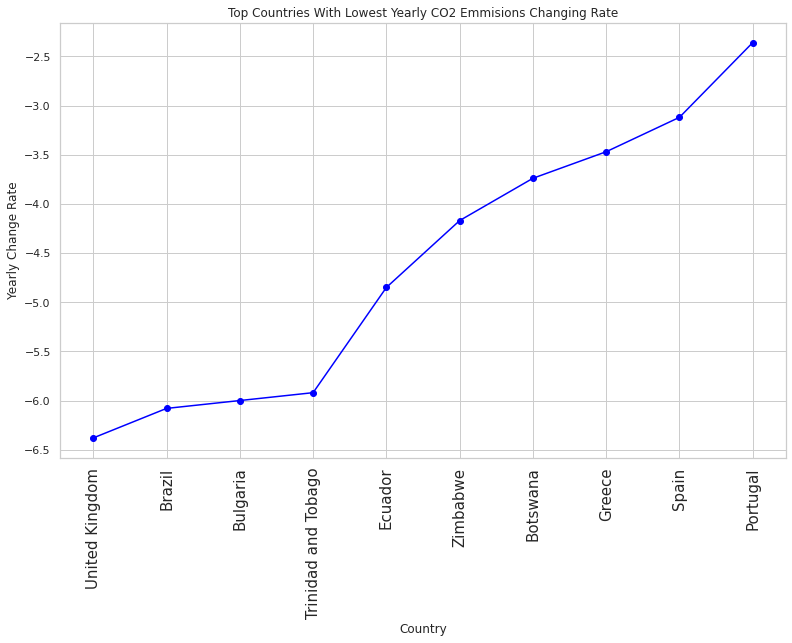

In [257]:
# Define plot space
fig, ax = plt.subplots(figsize=(13, 8))

# Define x and y axes
ax.plot(yr_sorted_asc.Country, 
        yr_sorted_asc.YearlyChange,
        marker = 'o',
        color = 'blue')

# Set plot title and axes labels
ax.set(title = "Top Countries With Lowest Yearly CO2 Emmisions Changing Rate",
       xlabel = "Country",
       ylabel = "Yearly Change Rate")
plt.xticks(rotation='vertical',size=15)
plt.show()

## Top Countries With **Highest** CO2 Emmisions Per Capital

>CO2 emissions per capita
Carbon emissions per capita are measured as the total amount of carbon dioxide emitted by the country as a consequence of all relevant human (production and consumption) activities, divided by the population of the country.

In [258]:
cap_sorted_dec = pd.DataFrame(df.sort_values(by=['Percapita'],ascending=False)).head(10)
cap_sorted_dec

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
150,Qatar,QAT,98990085,1.79,37.29,2654374,79.868
124,Montenegro,MNE,16249039,2.27,25.90,627264,76.568
101,Kuwait,KWT,101492225,1.36,25.65,3956875,75.224
189,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
196,United Arab Emirates,ARE,218788684,4.43,23.37,9360980,77.470
139,Oman,OMN,87835773,2.09,19.61,4479219,77.142
33,Canada,CAN,675918610,-1.00,18.58,36382944,82.117
27,Brunei,BRN,7672127,3.54,18.28,419800,75.450
110,Luxembourg,LUX,10144632,3.45,17.51,579264,81.803
13,Bahrain,BHR,24458384,2.50,17.15,1425792,76.899


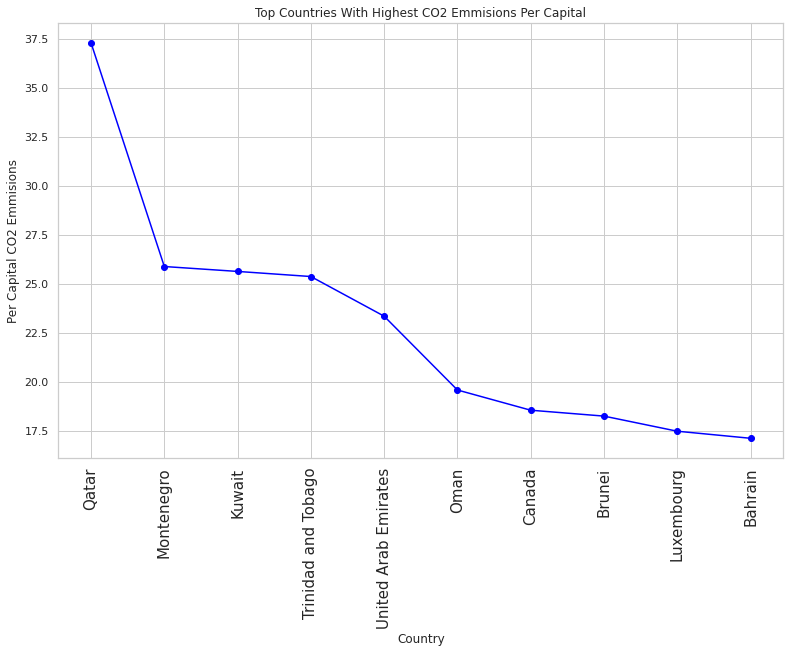

In [259]:
# Define plot space
fig, ax = plt.subplots(figsize=(13, 8))

# Define x and y axes
ax.plot(cap_sorted_dec.Country, 
        cap_sorted_dec.Percapita,
        marker = 'o',
        color = 'blue')

# Set plot title and axes labels
ax.set(title = "Top Countries With Highest CO2 Emmisions Per Capital",
       xlabel = "Country",
       ylabel = "Per Capital CO2 Emmisions")
plt.xticks(rotation='vertical',size=15)
plt.show()

## Top Countries With **Lowest** CO2 Emmisions Per Capital

In [260]:
cap_sorted_asc = pd.DataFrame(df.sort_values(by=['Percapita'],ascending=True)).head(10)
cap_sorted_asc

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
76,Greenland,GRL,1530,0.86,0.03,56412,71.493
62,Faeroe Islands,FRO,1953,0.60,0.04,48173,80.255
116,Mali,MLI,1606421,2.57,0.09,17965443,57.987
171,Somalia,SOM,1268442,2.57,0.09,14185636,56.324
61,Ethiopia,ETH,10438855,4.03,0.10,103603462,65.482
134,Niger,NER,2088475,0.15,0.10,20788798,61.137
30,Burundi,BDI,1093618,2.81,0.10,10487995,60.528
37,Chad,TCD,1670941,2.14,0.11,14561660,53.438
113,Malawi,MWI,1815598,3.26,0.11,17205261,62.681
112,Madagascar,MDG,3026047,2.85,0.12,24894370,65.931


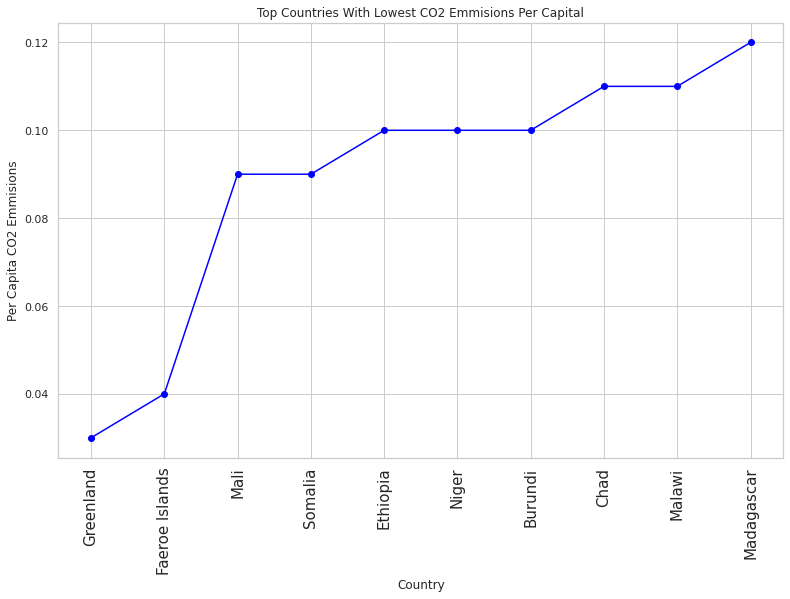

In [261]:
# Define plot space
fig, ax = plt.subplots(figsize=(13, 8))

# Define x and y axes
ax.plot(cap_sorted_asc.Country, 
        cap_sorted_asc.Percapita,
        marker = 'o',
        color = 'blue')

# Set plot title and axes labels
ax.set(title = "Top Countries With Lowest CO2 Emmisions Per Capital",
       xlabel = "Country",
       ylabel = "Per Capita CO2 Emmisions")
plt.xticks(rotation='vertical',size=15)
plt.show()

##  Correlation Between Each Features

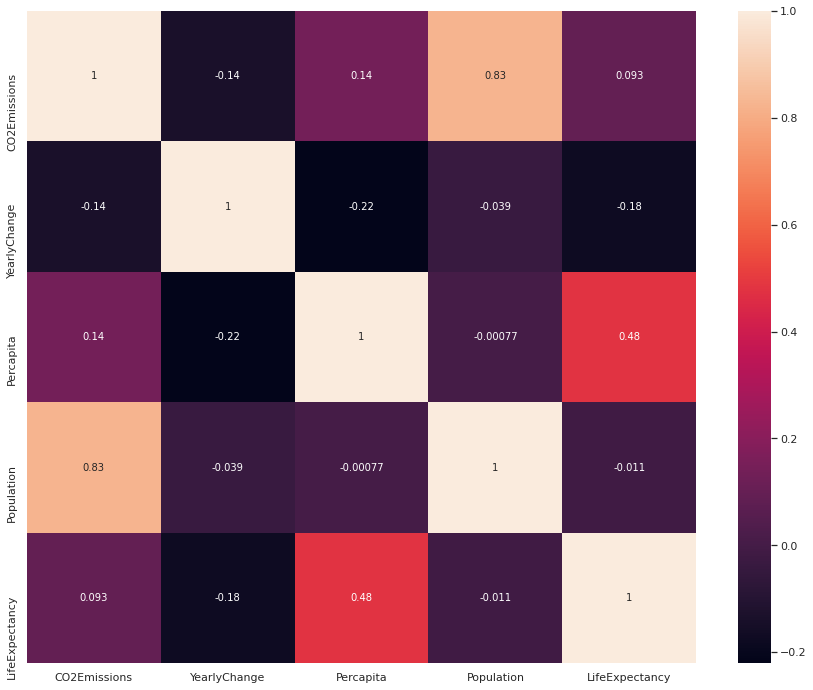

In [262]:
plt.figure(figsize=(15,12))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

### According To The Above Heatmap,
- ####  There Is A Strong Possitive Relationship Between CO2 Emmersion And Population

- #### There Is A Weak Possitive Relationship Between Percapital CO2 Emissions & Life Expectency

- ####  There Is A Weak Possitive Releationship Between CO2 Emmersion And Life Expectency

### How Life Expectency Distributed With CO2 Emmersion And Population 

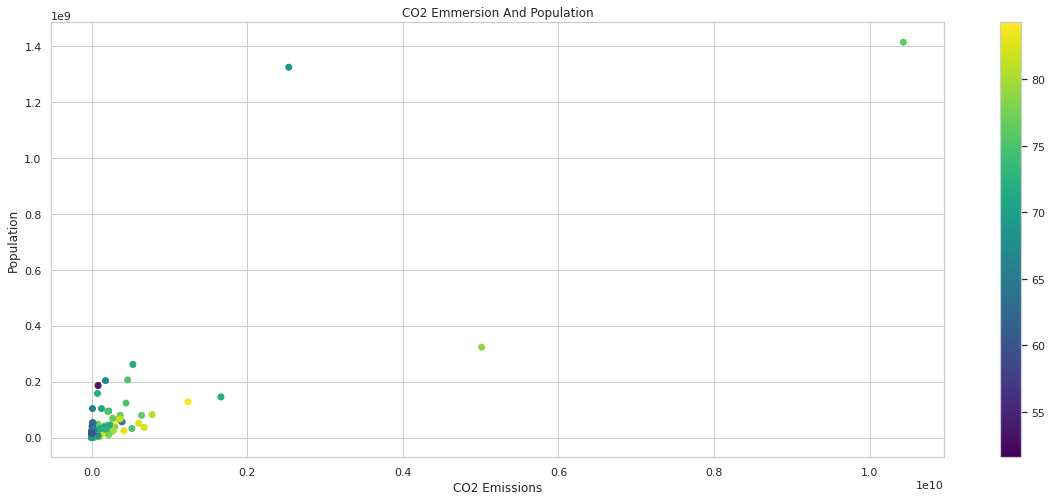

In [263]:
plt.figure(figsize=(20,8))
plt.scatter(df['CO2Emissions'],df['Population'],c=df['LifeExpectancy'],cmap='viridis')
plt.title("CO2 Emmersion And Population")
plt.xlabel('CO2 Emissions')
plt.ylabel('Population')
plt.colorbar()
plt.show()

### **Colour bar showing the Life Expectenxy : Near to Yellow means Higher Otherwise Lower** 

## There is a outlier with highest CO2 Emmisions & High Population. It is China.

### **Details About China**

In [264]:
china_df = pd.DataFrame(df[df['Country'] =='China'])
china_df

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
39,China,CHN,10432751400,-0.28,7.38,1414049351,76.21


### **Details About Greenland**

In [265]:
china_df = pd.DataFrame(df[df['Country'] =='Greenland'])
china_df

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
76,Greenland,GRL,1530,0.86,0.03,56412,71.493


- China Has Higher Life Expectency More Than Greenland which country has lowest CO2 Emmisions, Even china has highest CO2 Emmisions Value 

## **World Population Visualization** 

In [266]:
regions = gpd.read_file("../input/world-bound/WB_countries_Admin0_10m.shp")
print(regions.crs)

epsg:4326


<AxesSubplot:>

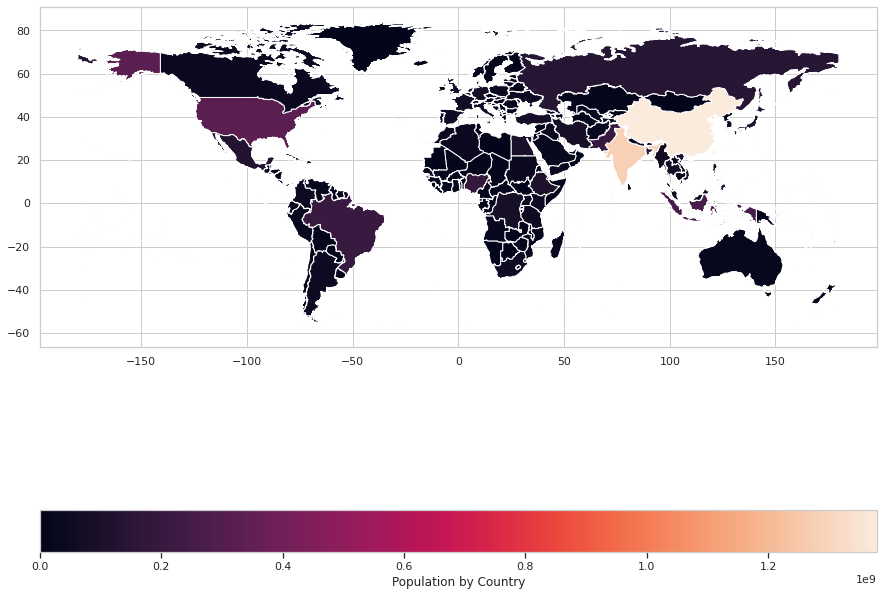

In [267]:
regions.plot(column='POP_EST',
            figsize=(15,20),
            legend=True,legend_kwds={'label': "Population by Country",'orientation': "horizontal"}
            )

## Top 10 Countries With Highest Population Visualization

In [268]:
popu_sort = pd.DataFrame(df.sort_values(by=['Population'],ascending=False)).head(10)
popu_sort

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
39,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
88,India,IND,2533638100,4.71,1.91,1324517249,68.897
198,United States,USA,5011686600,-2.01,15.52,323015995,78.885
89,Indonesia,IDN,530035650,6.41,2.03,261556381,71.035
25,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
140,Pakistan,PAK,178013820,9.13,0.87,203631353,66.770
135,Nigeria,NGA,82634214,0.70,0.44,185960241,53.541
14,Bangladesh,BGD,74476230,4.50,0.47,157977153,71.785
153,Russia,RUS,1661899300,-2.13,11.44,145275383,71.835
96,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090


## **As to above details we can determine most developed countries such :**
>##  -  **China**
>##  - **United Satates**
>##  - **Brazil**
>##  - **Russia**
>##  - **Japan**
<br>
## **Conclusion**
>- Highest CO2 Emmisions Country is China | Lowest is Greenland
>
>- Highest Life Expectency Country is Hong Kong | Lowest is Aftrica Republic
>
>- Highest CO2 Emmisions Changing Rate Country is North Korea | Lowest is United Kindom
>
>- Highest CO2 Emmisions Per Capital Country is Qatar | Lowest is Greenland

>-  There Is A Strong Possitive Relationship Between CO2 Emmersion And Population
    ,There Is A Weak Possitive Relationship Between Percapital CO2 Emissions & Life Expectency
    ,There Is A Weak Possitive Releationship Between CO2 Emmersion And Life Expectency
>
>- Above mentioned has Most Life Expectency Even There CO2 Emmissions is High ( There Is A Weak Possitive Releationship Between CO2 Emmersion And Life Expectency ) Because Of Their Economies Grow Higher Which Allows Them To Spend More On Health Care Which Then Increaseslife Expectancy.
>
>- Their is a reasion to why showing their C02 Emmisions High is above mentioned countries has the most industraies such as nuclear Power Stations etc.
>
>- When we considering most coal consumption countries we can see above mentions 5 countries included in top of that list.
thats main reasion for have highly CO2 Emmisions for that countries. and also they generate massive income from it. becasue of that.
>
>- Driving into China's CO2 emissions there are massive coal productions. China's generation of electricity from coal has dropped slightly from 75% in 1992 to 70% in 2015. Still, overall coal production has tripled since 2000 to nearly 4,000 million metric tons – approximately half of all global coal production.

## **References**

>### https://datacatalog.worldbank.org/dataset/world-bank-official-boundaries
>### https://www.kaggle.com/sansuthi/global-co2-emissions